In [1]:
import pandas as pd

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.float_format', lambda x: '%.3f' %x)

In [2]:
import xlsxwriter

In [3]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [4]:
%ls

README.md               wyceny_2018_01_05.xlsx  xlsx/
wyceny_2018_01_04.xlsx  wykresy_xlsx.ipynb


In [5]:
df = pd.read_excel('wyceny_2018_01_05.xlsx')

In [6]:
df.head(2)

,Allianz Obligacji Plus,Allianz Stabilnego Wzrostu,Allianz Akcji,Allianz Pieniężny,Allianz Polskich Obligacji Skarbowych,Allianz Aktywnej Alokacji,Allianz Selektywny,Allianz Małych i Średnich Spółek,Allianz FIO Subfundusz Akcji Globalnych,Allianz FIO Subfundusz Obligacji Globalnych,Allianz FIO Subfundusz Surowców i Energii,Allianz Akcji Rynków Wschodzących SFIO,SFIO Defensywna Multistrategia,SFIO Zbalansowana Multistrategia,SFIO Dynamiczna Multistrategia,SFIO Małych Spółek Europejskich,SFIO Dywidendowy Akcji Europejskich,Allianz FIO Allianz Globalny Stabilnego Dochodu,Allianz SFIO Europe Equity Growth Select,Allianz SFIO Flexi Asia Bond,Allianz SFIO Global Metals and Mining,Allianz SFIO India Equity,Allianz SFIO US Short Duration High Income Bond,Allianz SFIO PIMCO Global Low Duration Real Return,Allianz SFIO Structured Return (Pieniężny Globalny),Allianz SFIO PIMCO Global Bond,Allianz SFIO PIMCO Global High Yield Bond,Allianz SFIO PIMCO Global Investment Grade Credit,Allianz SFIO PIMCO Emerging Local Bond,Allianz SFIO PIMCO Income,Allianz SFIO PIMCO Emerging Markets Bond,BEZPIECZNA JESIEŃ SFIO SUBFUNDUSZ AKCJI,BEZPIECZNA JESIEŃ SFIO SUBFUNDUSZ ZRÓWNOWAŻONY,BEZPIECZNA JESIEŃ SFIO SUBFUNDUSZ STABILNEGO WZROSTU,BEZPIECZNA JESIEŃ SFIO SUBFUNDUSZ OBLIGACJI,BEZPIECZNA JESIEŃ SFIO SUBFUNDUSZ PIENIĘŻNY
2004-01-27,100.000,100.000,100.000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2004-01-28,100.310,100.310,100.310,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


In [7]:
df = df.rename({'Allianz SFIO Flexi Asia Bond': 'Allianz SFIO Artificial Intelligence'}, axis='columns')

In [8]:
df = df.drop_duplicates(keep='first')

#new_index = pd.date_range(start=df.index[0], end=df.index[-1], freq='D')

#df = df.reindex(new_index, method='ffill')

In [9]:
df.loc[df.index.duplicated()]

,Allianz Obligacji Plus,Allianz Stabilnego Wzrostu,Allianz Akcji,Allianz Pieniężny,Allianz Polskich Obligacji Skarbowych,Allianz Aktywnej Alokacji,Allianz Selektywny,Allianz Małych i Średnich Spółek,Allianz FIO Subfundusz Akcji Globalnych,Allianz FIO Subfundusz Obligacji Globalnych,Allianz FIO Subfundusz Surowców i Energii,Allianz Akcji Rynków Wschodzących SFIO,SFIO Defensywna Multistrategia,SFIO Zbalansowana Multistrategia,SFIO Dynamiczna Multistrategia,SFIO Małych Spółek Europejskich,SFIO Dywidendowy Akcji Europejskich,Allianz FIO Allianz Globalny Stabilnego Dochodu,Allianz SFIO Europe Equity Growth Select,Allianz SFIO Artificial Intelligence,Allianz SFIO Global Metals and Mining,Allianz SFIO India Equity,Allianz SFIO US Short Duration High Income Bond,Allianz SFIO PIMCO Global Low Duration Real Return,Allianz SFIO Structured Return (Pieniężny Globalny),Allianz SFIO PIMCO Global Bond,Allianz SFIO PIMCO Global High Yield Bond,Allianz SFIO PIMCO Global Investment Grade Credit,Allianz SFIO PIMCO Emerging Local Bond,Allianz SFIO PIMCO Income,Allianz SFIO PIMCO Emerging Markets Bond,BEZPIECZNA JESIEŃ SFIO SUBFUNDUSZ AKCJI,BEZPIECZNA JESIEŃ SFIO SUBFUNDUSZ ZRÓWNOWAŻONY,BEZPIECZNA JESIEŃ SFIO SUBFUNDUSZ STABILNEGO WZROSTU,BEZPIECZNA JESIEŃ SFIO SUBFUNDUSZ OBLIGACJI,BEZPIECZNA JESIEŃ SFIO SUBFUNDUSZ PIENIĘŻNY


In [10]:


df = df.resample('D').ffill()

In [66]:
df.tail(3)

,Allianz Obligacji Plus,Allianz Stabilnego Wzrostu,Allianz Akcji,Allianz Pieniężny,Allianz Polskich Obligacji Skarbowych,Allianz Aktywnej Alokacji,Allianz Selektywny,Allianz Małych i Średnich Spółek,Allianz FIO Subfundusz Akcji Globalnych,Allianz FIO Subfundusz Obligacji Globalnych,Allianz FIO Subfundusz Surowców i Energii,Allianz Akcji Rynków Wschodzących SFIO,SFIO Defensywna Multistrategia,SFIO Zbalansowana Multistrategia,SFIO Dynamiczna Multistrategia,SFIO Małych Spółek Europejskich,SFIO Dywidendowy Akcji Europejskich,Allianz FIO Allianz Globalny Stabilnego Dochodu,Allianz SFIO Europe Equity Growth Select,Allianz SFIO Artificial Intelligence,Allianz SFIO Global Metals and Mining,Allianz SFIO India Equity,Allianz SFIO US Short Duration High Income Bond,Allianz SFIO PIMCO Global Low Duration Real Return,Allianz SFIO Structured Return (Pieniężny Globalny),Allianz SFIO PIMCO Global Bond,Allianz SFIO PIMCO Global High Yield Bond,Allianz SFIO PIMCO Global Investment Grade Credit,Allianz SFIO PIMCO Emerging Local Bond,Allianz SFIO PIMCO Income,Allianz SFIO PIMCO Emerging Markets Bond,BEZPIECZNA JESIEŃ SFIO SUBFUNDUSZ AKCJI,BEZPIECZNA JESIEŃ SFIO SUBFUNDUSZ ZRÓWNOWAŻONY,BEZPIECZNA JESIEŃ SFIO SUBFUNDUSZ STABILNEGO WZROSTU,BEZPIECZNA JESIEŃ SFIO SUBFUNDUSZ OBLIGACJI,BEZPIECZNA JESIEŃ SFIO SUBFUNDUSZ PIENIĘŻNY
2018-01-03,169.220,131.660,154.090,154.760,142.400,105.330,102.050,141.620,128.130,109.370,102.170,117.860,106.200,113.270,120.010,122.280,113.640,113.970,110.640,107.650,119.130,121.430,103.630,100.690,102.260,100.610,110.410,102.560,104.500,107.290,106.650,14.690,14.230,14.020,13.280,12.390
2018-01-04,169.320,132.460,156.810,154.860,142.550,106.150,103.870,142.460,128.910,109.460,102.200,118.350,106.560,113.980,120.980,122.940,114.330,114.250,111.160,109.200,119.380,122.190,103.720,100.700,102.300,100.660,110.660,102.650,105.230,107.370,106.720,14.970,14.360,14.120,13.300,12.400
2018-01-05,169.370,132.770,156.750,154.920,142.680,106.360,103.830,142.920,129.660,109.500,102.070,119.260,106.950,114.520,121.710,124.030,115.060,114.460,112.240,109.770,120.210,122.850,103.740,100.690,102.310,100.650,110.830,102.650,105.150,107.370,106.870,14.980,14.380,14.130,13.330,12.400


In [68]:
import pandas_datareader.data as web


ten_year = web.DataReader("DGS10", "fred")

ten_year = ten_year.resample('D').ffill()

two_year = web.DataReader("DGS2", "fred")
two_year = two_year.resample('D').ffill()

two_year.tail(5)

,DGS2
DATE,
2018-01-01,nan
2018-01-02,1.920
2018-01-03,1.940
2018-01-04,1.960
2018-01-05,1.960


In [69]:
pimco_income = df['Allianz SFIO PIMCO Income'].dropna().copy().to_frame()

pimco_income['2Y_yield'] = two_year

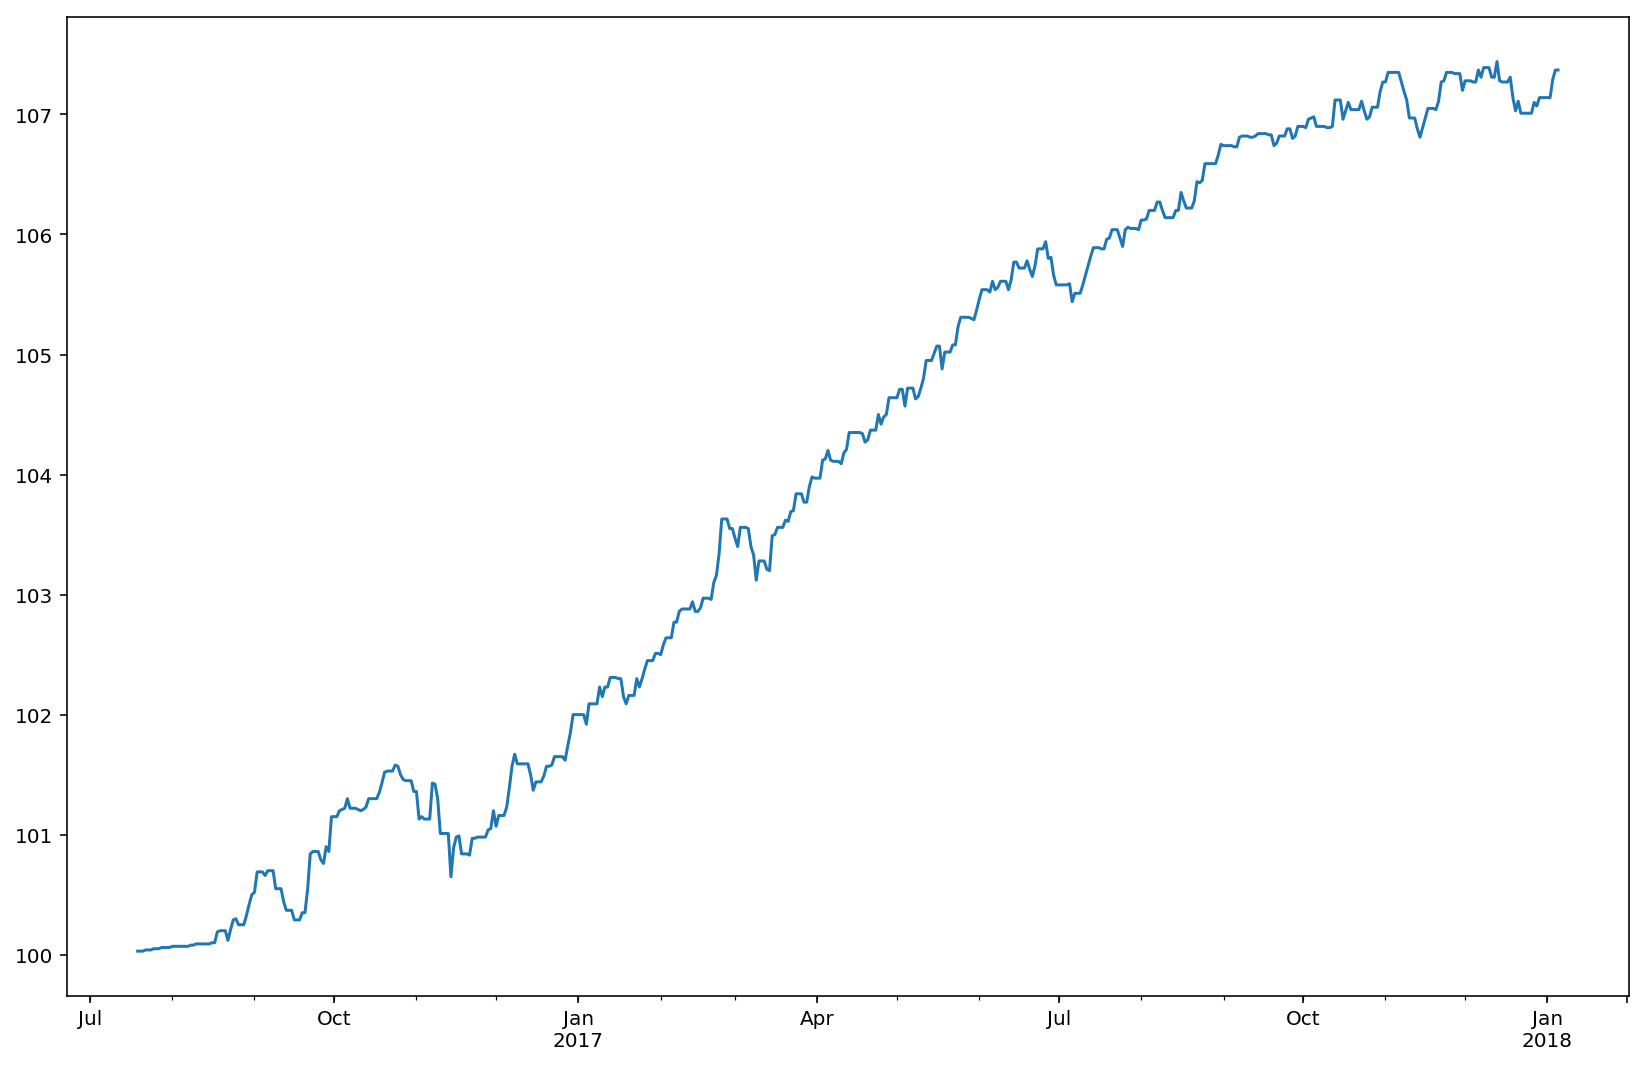

In [70]:
pimco_income['Allianz SFIO PIMCO Income'].plot(figsize = (14,9))


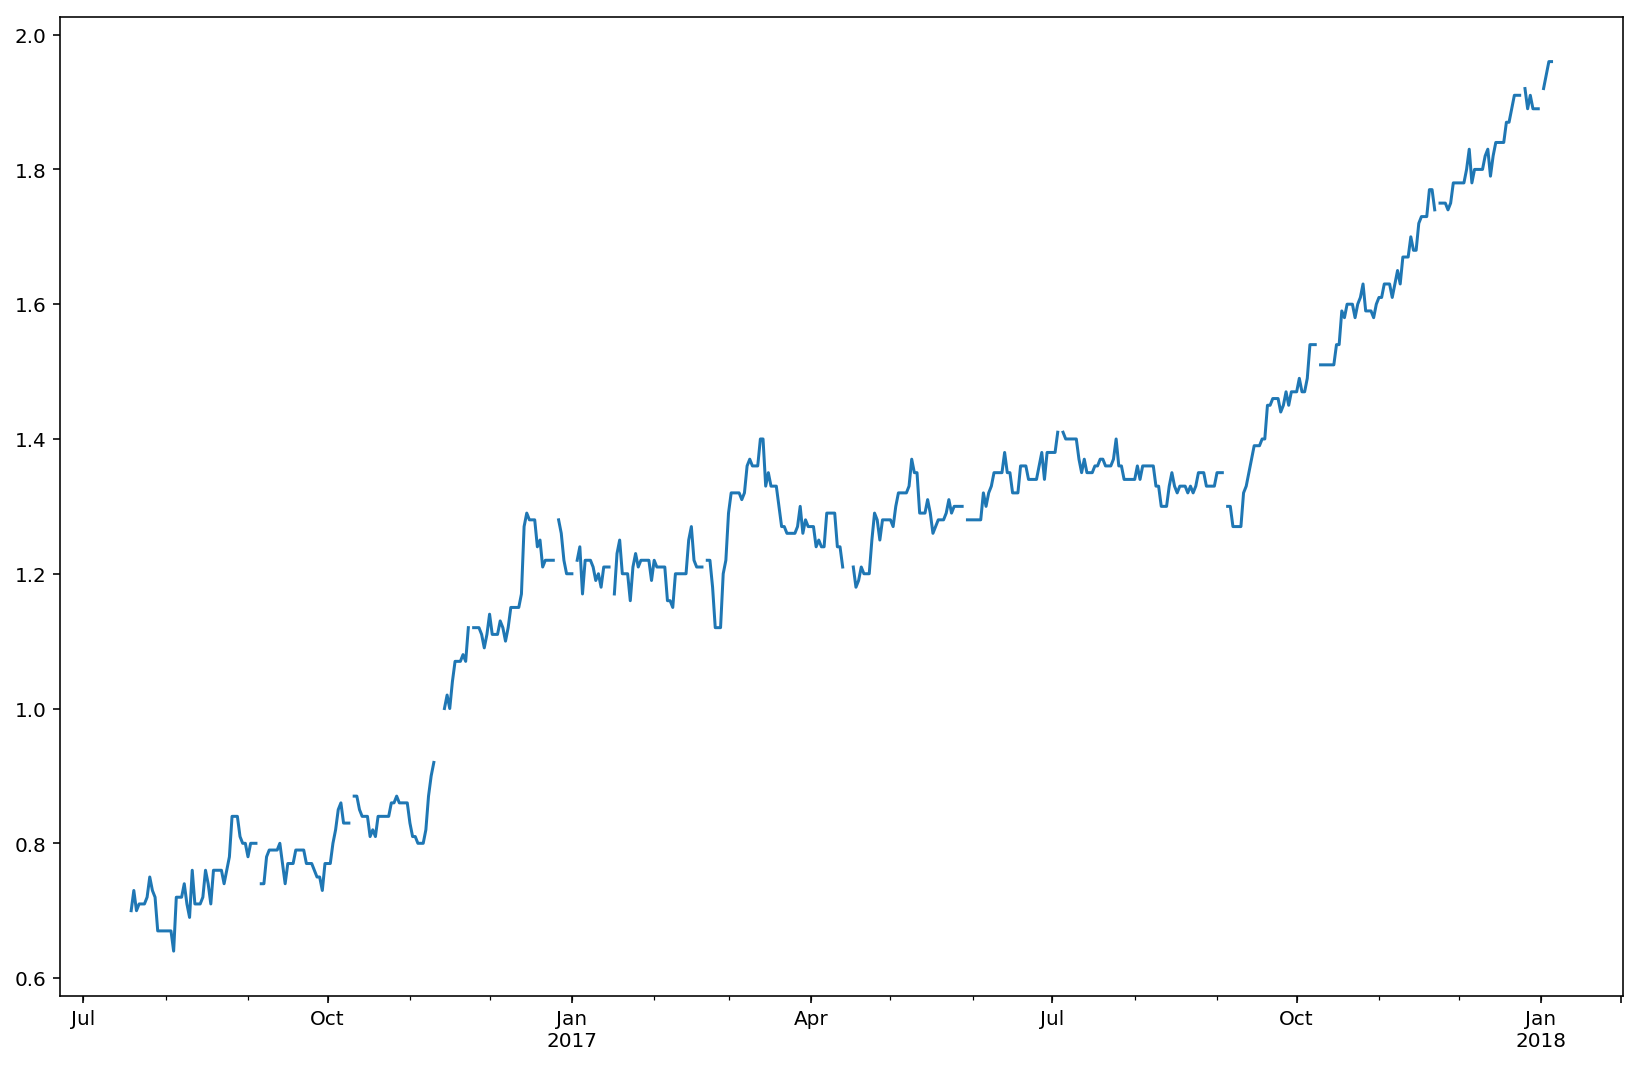

In [71]:
pimco_income['2Y_yield'].plot(figsize = (14,9))

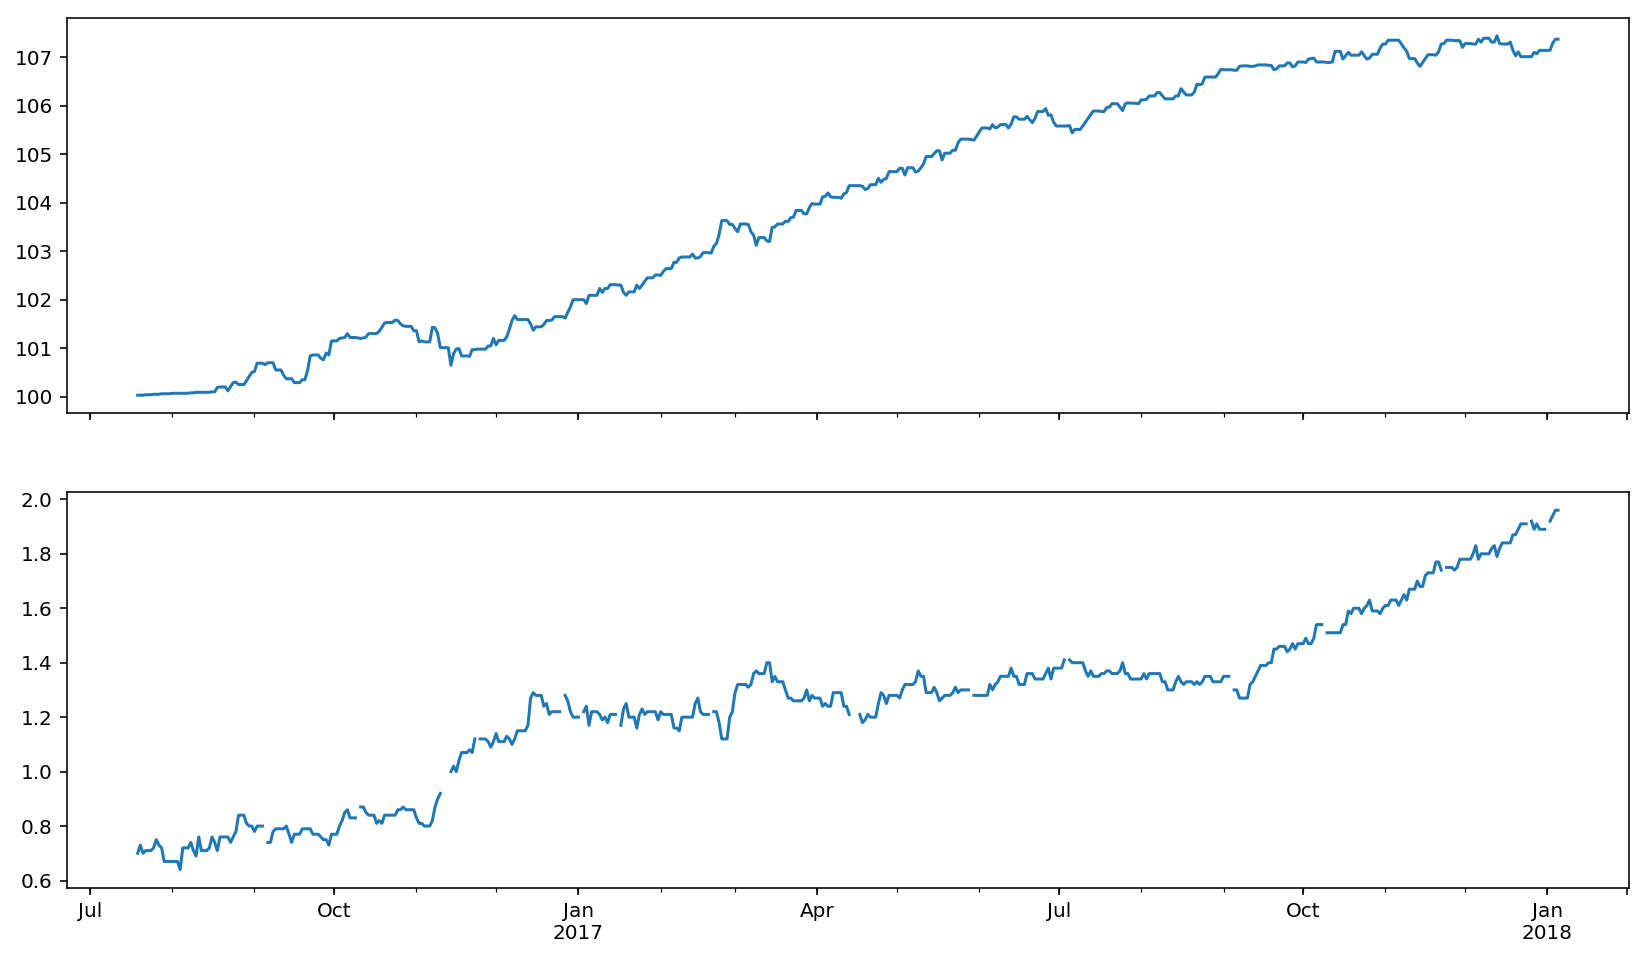

In [86]:
import matplotlib.pyplot as plt

fig,(ax1, ax2) = plt.subplots(2,1, figsize=(14,8), sharex=True)
pimco_income['Allianz SFIO PIMCO Income'].plot(ax=ax1)
pimco_income['2Y_yield'].plot(ax=ax2)


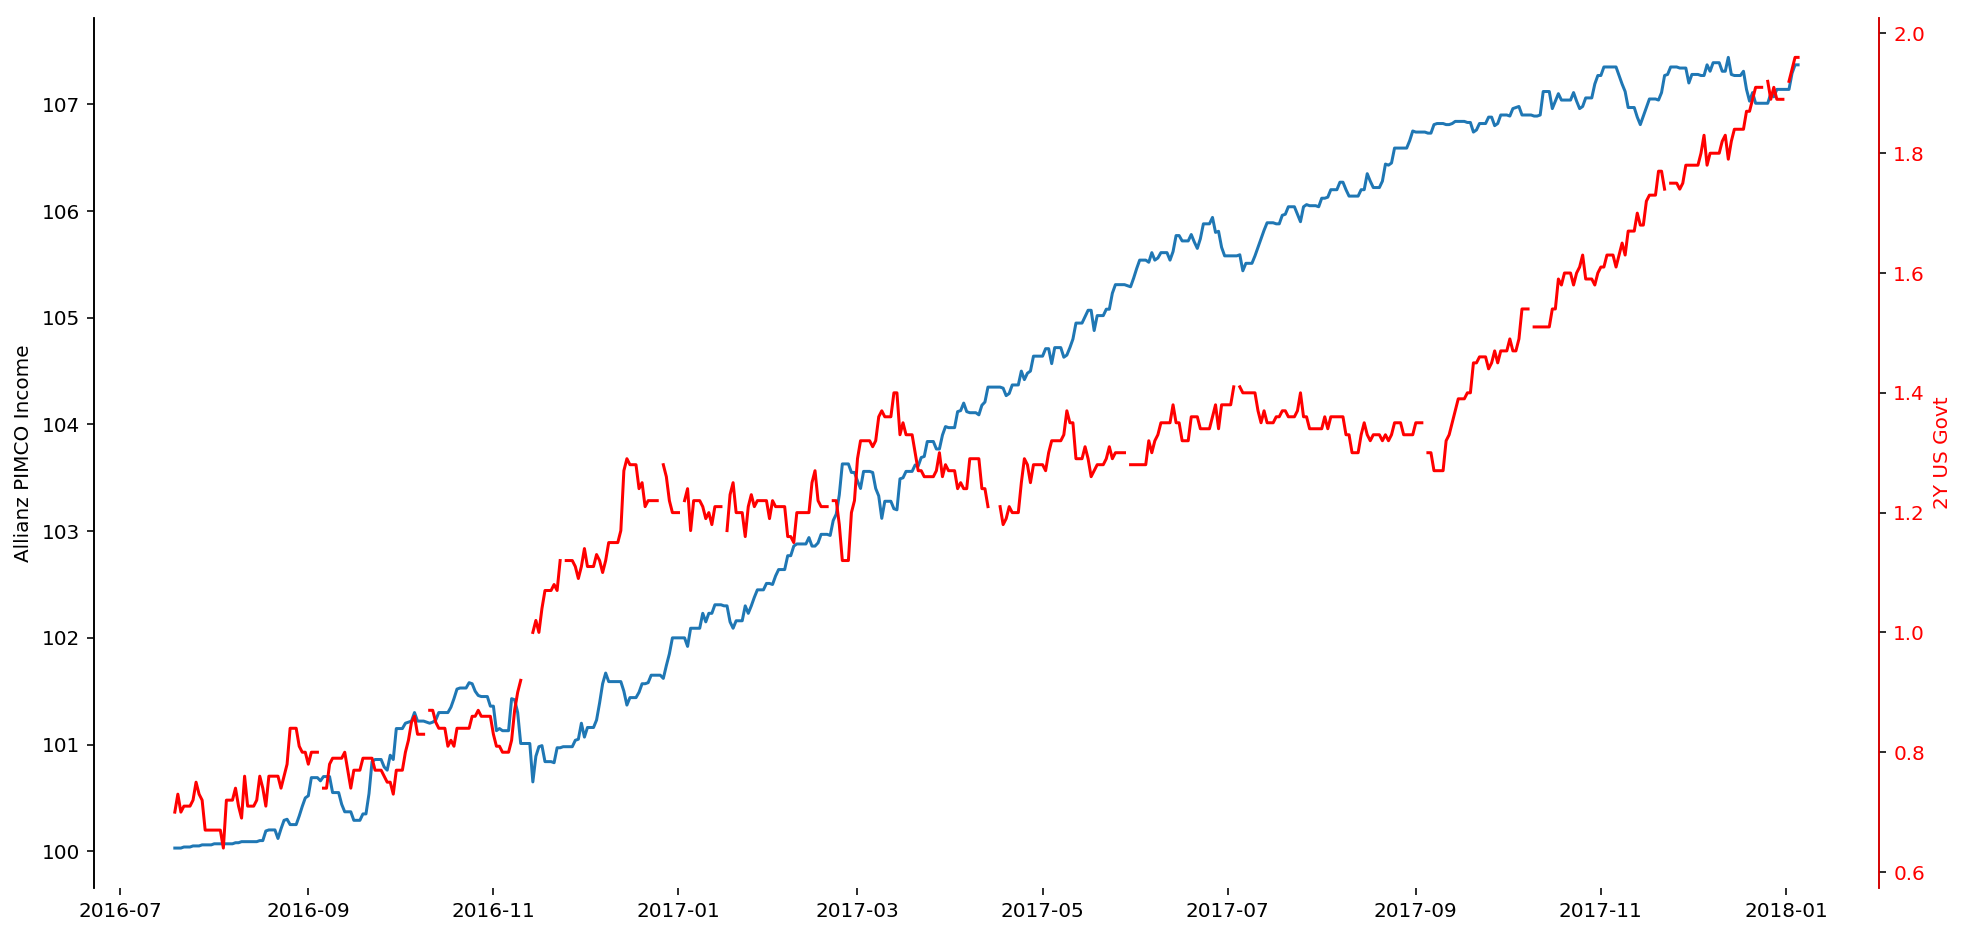

In [106]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (16,8))
ax1 = ax.twinx()
ax.plot(pimco_income['Allianz SFIO PIMCO Income'])
ax1.plot(pimco_income['2Y_yield'], color = 'r')




for t in ax1.get_yticklabels():
    t.set_color('r')


ax1.spines['right'].set_color('r')

ax1.spines['top'].set_color('None')
ax.spines['top'].set_color('None')

ax1.spines['bottom'].set_color('None')
ax.spines['bottom'].set_color('None')

ax.set_ylabel('Allianz PIMCO Income')
ax1.set_ylabel('2Y US Govt', color='r')

plt.show()

OrderedDict([('left', <matplotlib.spines.Spine at 0x120107c88>),
             ('right', <matplotlib.spines.Spine at 0x120107e80>),
             ('bottom', <matplotlib.spines.Spine at 0x1201100b8>),
             ('top', <matplotlib.spines.Spine at 0x1201102b0>)])